<a href="https://colab.research.google.com/github/Say1309/An-lisis-de-alojamientos-de-Airbnb/blob/main/Segmentaci%C3%B3n_de_alojamientos_y_predicci%C3%B3n_de_precio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análisis de alojamientos de Airbnb
**Autor:** Ingrid Sayuri Mota de la Rosa  
**Fecha:** Mayo 2025  
**Objetivo:** Segmentar alojamientos y predecir precios usando datos abiertos de Airbnb.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Airbnb_Open_Data.csv to Airbnb_Open_Data.csv


In [3]:
import pandas as pd

df = pd.read_csv('Airbnb_Open_Data.csv')
df.head()


<ipython-input-3-df741ad84501>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 1. Limpieza de datos

Importamos las librerías que usaremos para graficar, analizar los datos y realizar la limpieza

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Realizamos una revisión inicial

In [5]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


**Conversión de precios y tasas**:
Las columnas price y service free están como texto, por lo que para realizar el análisis las convertimos a número.

In [6]:
# Limpiar columnas de precio y convertir a numérico
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


Eliminamos columnas innecesarias, es decir, cuyos datos no nos sirven para el análisis general de precios y que pueden eliminarse para simplificar.

In [7]:
# Eliminar columnas irrelevantes
columnas_a_eliminar = [
    'id', 'host id', 'host name', 'license', 'house_rules',
    'last review', 'host_identity_verified', 'country code'
]
df.drop(columns=columnas_a_eliminar, inplace=True)

**Valores nulos**: revisamos qué columnas son esenciales y cuáles tienen muchos valores nulos

In [8]:
# Rellenar valores nulos
df['reviews per month'] = df['reviews per month'].fillna(0)
df['review rate number'] = df['review rate number'].fillna(0)
df['calculated host listings count'] = df['calculated host listings count'].fillna(0)
df['availability 365'] = df['availability 365'].fillna(0)
df['minimum nights'] = df['minimum nights'].fillna(df['minimum nights'].median())
df['number of reviews'] = df['number of reviews'].fillna(0)

# Eliminar filas con precio nulo
df = df[df['price'].notnull()]

Revisamos el resultado obtenido hasta el momento

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 102352 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102105 non-null  object 
 1   neighbourhood group             102324 non-null  object 
 2   neighbourhood                   102337 non-null  object 
 3   lat                             102344 non-null  float64
 4   long                            102344 non-null  float64
 5   country                         101825 non-null  object 
 6   instant_bookable                102252 non-null  object 
 7   cancellation_policy             102281 non-null  object 
 8   room type                       102352 non-null  object 
 9   Construction year               102142 non-null  float64
 10  price                           102352 non-null  float64
 11  service fee                     102113 non-null  float64
 12  minimum nights       

,NAME,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,United States,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0
3,NaN,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0


**Detección de outliers**: nos centraremos en price, minimun nights, number of review. Usamos boxplots para visualizar los outliers

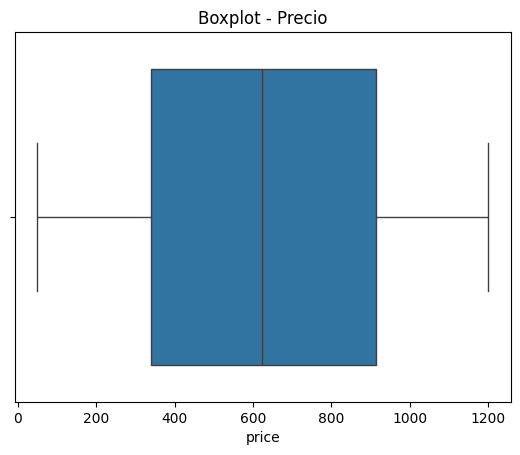

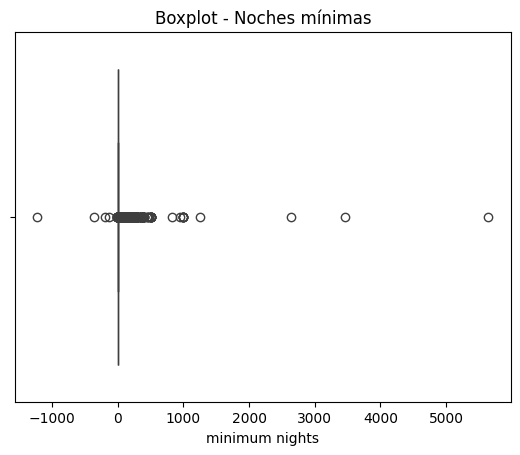

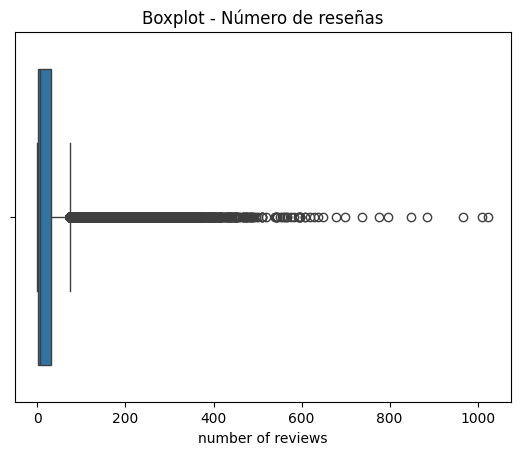

In [12]:
# Boxplot del precio
sns.boxplot(x=df['price'])
plt.title('Boxplot - Precio')
plt.show()

# Boxplot de noches mínimas
sns.boxplot(x=df['minimum nights'])
plt.title('Boxplot - Noches mínimas')
plt.show()

# Boxplot del número de reseñas
sns.boxplot(x=df['number of reviews'])
plt.title('Boxplot - Número de reseñas')
plt.show()


*¿Por qué boxplot?*

El diagrama de cajas y bigotes nos sirve para visualizar la distribución de los datos lo que nos permite detectar valores atípicos (outliers). La caja central representa el 50% de los datos, del Q1 al Q3; la línea dentro de la caja es la mediana Q2, los bigotes se extienden hasta el dato mínimo y máximo no atípico, y por tanto, los puntos fuera de los bigotes corresponden a datos atípicos (outliers).

**Eliminación de outliers extremos**

Dado que en se presentan datos atípicos, usaremos el método del rango intercuatílico (IQR). El rango intercuatílico mide la distancia entre el primer cuartil Q1 y el tercer cuartil Q3.

IQR=Q3-Q1=75%-25%=50%

Lo usamos para definir los límites razonables de una variable. En nuestro ejemplo, lo aplicaremos para definir los límites de las variables que estamos estudiando.

In [13]:
# Función para eliminar outliers basada en IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# Aplicar la función
df = eliminar_outliers(df, 'price')
df = eliminar_outliers(df, 'minimum nights')
df = eliminar_outliers(df, 'number of reviews')

**Preparar las variables para el análisis**

Seleccionamos las variables importantes y convertimos room type y neighbourhood group

In [14]:
# Selección de columnas para el modelo
columnas_utiles = [
    'price', 'minimum nights', 'number of reviews',
    'reviews per month', 'availability 365', 'service fee',
    'room type', 'neighbourhood group'
]

df_modelo = df[columnas_utiles].copy()

# Codificar variables categóricas (one-hot encoding)
df_modelo = pd.get_dummies(df_modelo, columns=['room type', 'neighbourhood group'], drop_first=True)

# Confirmar las columnas resultantes
df_modelo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 75082 entries, 2 to 102598
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              75082 non-null  float64
 1   minimum nights                     75082 non-null  float64
 2   number of reviews                  75082 non-null  float64
 3   reviews per month                  75082 non-null  float64
 4   availability 365                   75082 non-null  float64
 5   service fee                        74932 non-null  float64
 6   room type_Hotel room               75082 non-null  bool   
 7   room type_Private room             75082 non-null  bool   
 8   room type_Shared room              75082 non-null  bool   
 9   neighbourhood group_Brooklyn       75082 non-null  bool   
 10  neighbourhood group_Manhattan      75082 non-null  bool   
 11  neighbourhood group_Queens         75082 non-null  bool   

## 2. Análisis exploratorio con visualizaciones

**Comparación de precios por tipo de alojamiento**

Esta comparación nos ayuda a ver cómo varía el precio según el tipo de habitación. El bloxpot es útil para ver la distribución y el gráfico de barras muestra el precio medio de cada tipo de alojamiento

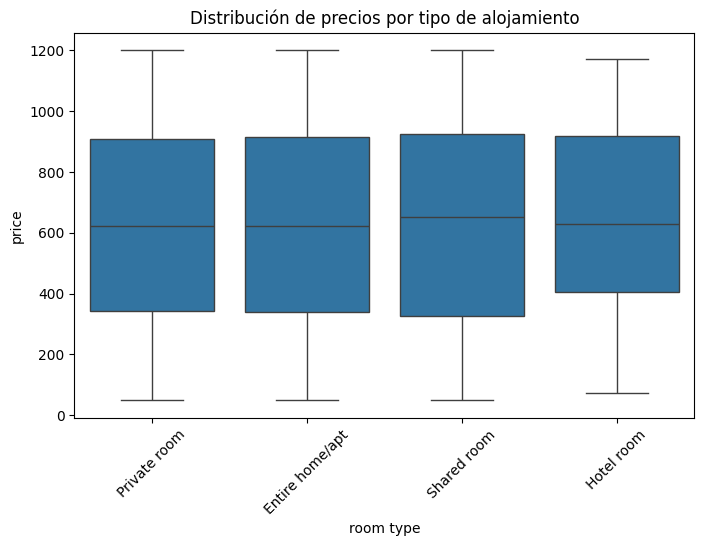

<ipython-input-20-64cc8a61d5ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_medio.index, y=precio_medio.values, palette='Set2')


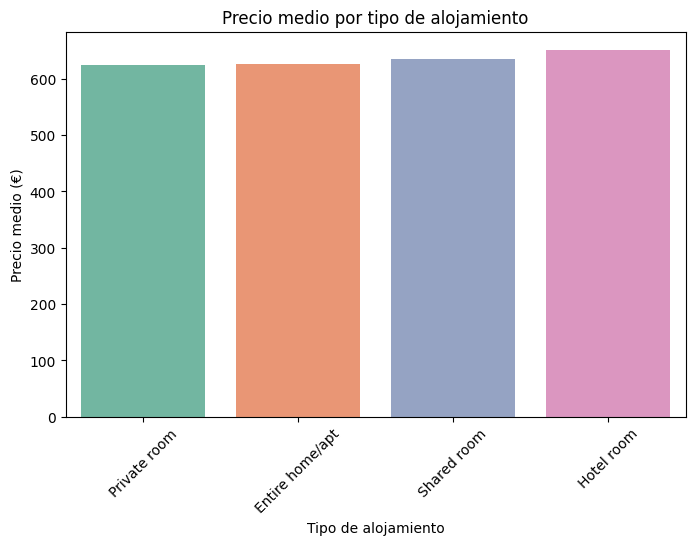

In [20]:
# Distribución de precios por tipo de alojamiento
plt.figure(figsize=(8,5))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Distribución de precios por tipo de alojamiento')
plt.xticks(rotation=45)
plt.show()

# Precio medio por tipo de habitación
precio_medio = df.groupby('room type')['price'].mean().sort_values()
precio_medio_df = precio_medio.reset_index()
precio_medio_df.columns = ['room type', 'mean_price']

plt.figure(figsize=(8,5))
sns.barplot(x=precio_medio.index, y=precio_medio.values, palette='Set2')
plt.title('Precio medio por tipo de alojamiento')
plt.ylabel('Precio medio (€)')
plt.xlabel('Tipo de alojamiento')
plt.xticks(rotation=45)
plt.show()


**Mapa de calor de correlación**

Este mapa muestra cómo se relacionan las variables numéricas entre si

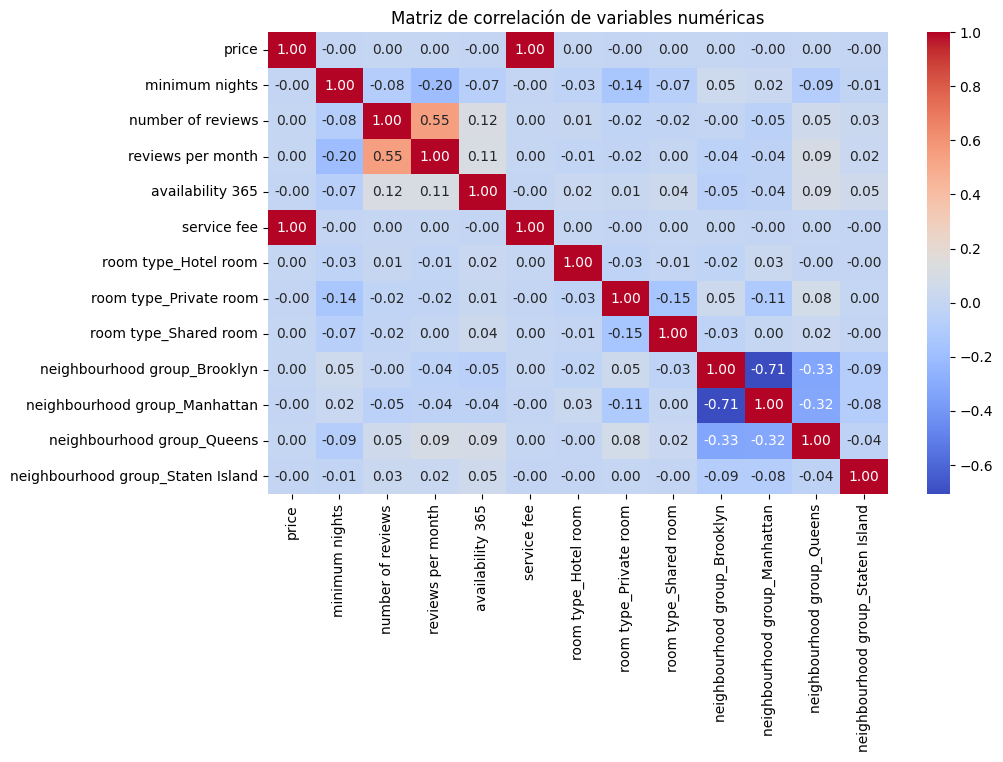

In [21]:
# Seleccionar solo variables numéricas
correlacion = df_modelo.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()


**Segmentación de alojamientos por rangos de precio y ubicación**

Creamos rangos de precios y los comparamos con zonas (neighbourhood group)

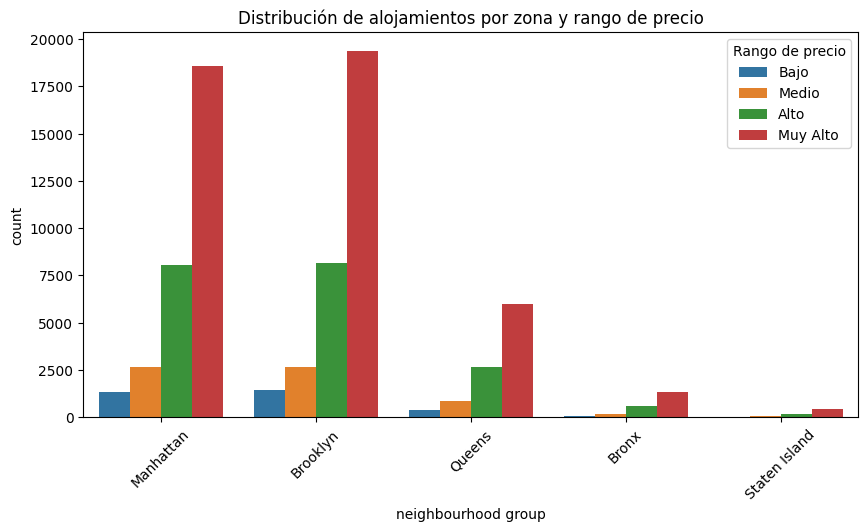

In [22]:
# Crear rangos de precio
df['rango_precio'] = pd.cut(df['price'], bins=[0, 100, 200, 500, 10000], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Gráfico de conteo por zona y rango
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='neighbourhood group', hue='rango_precio')
plt.title('Distribución de alojamientos por zona y rango de precio')
plt.xticks(rotation=45)
plt.legend(title='Rango de precio')
plt.show()


**Visualizaciones importantes**

Precio promedio por zona

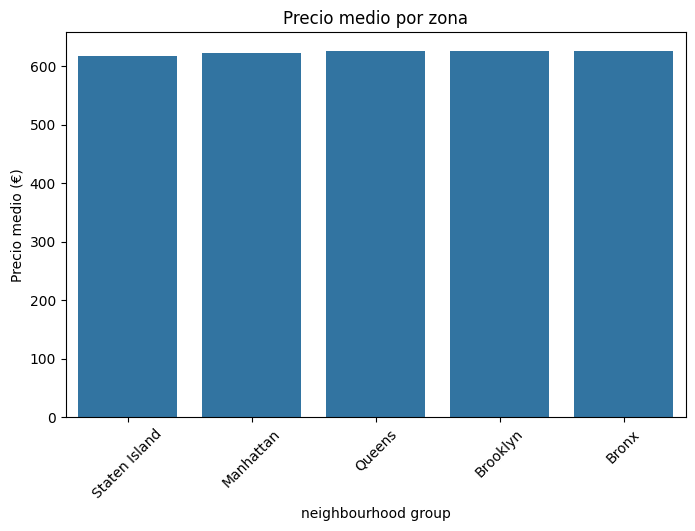

In [23]:
precio_zona = df.groupby('neighbourhood group')['price'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=precio_zona.index, y=precio_zona.values)
plt.title('Precio medio por zona')
plt.ylabel('Precio medio (€)')
plt.xticks(rotation=45)
plt.show()


Cantidad de alojamientos por tipo

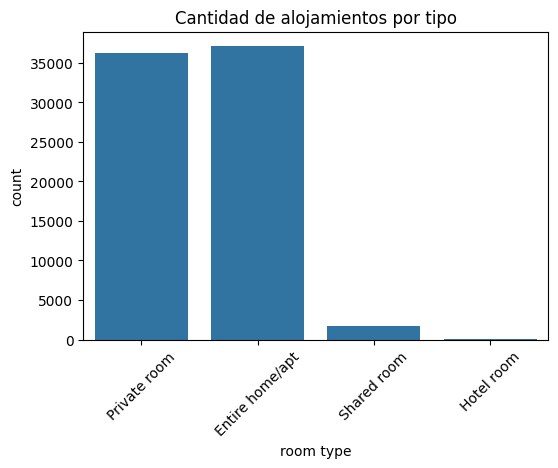

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='room type', data=df)
plt.title('Cantidad de alojamientos por tipo')
plt.xticks(rotation=45)
plt.show()


## 3. Modelo de predicción de precios

**Variables utilizadas**

Las variables que ocupamos son las siguientes

| Variable                | Tipo       | Descripción breve                              |
| ----------------------- | ---------- | ---------------------------------------------- |
| `minimum nights`        | Numérica   | Restricción mínima de reserva                  |
| `number of reviews`     | Numérica   | Popularidad del alojamiento                    |
| `reviews per month`     | Numérica   | Frecuencia de opiniones                        |
| `availability 365`      | Numérica   | Días disponibles en el año                     |
| `service fee`           | Numérica   | Tarifa adicional                               |
| `room type_*`           | Categórica | Tipo de alojamiento (One-Hot Encoded)          |
| `neighbourhood group_*` | Categórica | Zona general del alojamiento (One-Hot Encoded) |



In [39]:
# Selección de variables útiles
columnas_utiles = [
    'price', 'minimum nights', 'number of reviews',
    'reviews per month', 'availability 365', 'service fee',
    'room type', 'neighbourhood group'
]

# Crear nuevo DataFrame solo con las columnas relevantes
df_modelo = df[columnas_utiles].copy()

# Codificación one-hot con variables numéricas (0/1)
df_modelo = pd.get_dummies(df_modelo, columns=['room type', 'neighbourhood group'], drop_first=True, dtype=int)

# Eliminar filas con valores nulos
df_modelo = df_modelo.dropna()

Dividimos los datos

In [40]:
#from sklearn.model_selection import train_test_split
# Separar variable objetivo y predictoras
X = df_modelo.drop(columns='price')
y = df_modelo['price']

# División 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Entrenamiento y evaluación del modelo**

Para iniciar usamos una regresión lineal simple ya que se trata de un modelo básico muy útil

RMSE: 1.42
MAE: 1.20
R²: 1.000


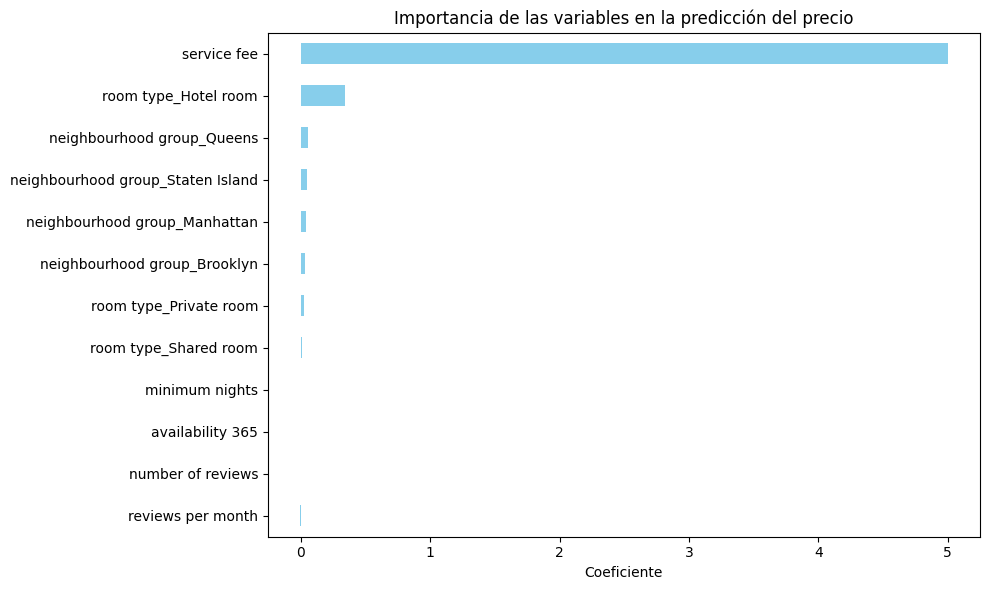

In [44]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones sobre datos de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.3f}')

# Mostrar coeficientes ordenados
importancia = pd.Series(modelo.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10,6))
importancia.plot(kind='barh', color='skyblue')
plt.title('Importancia de las variables en la predicción del precio')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

El modelo obtuvo métricas aparentemente perfectas (R² = 1.000), lo cual no es realista en un entorno real. Al revisar las variables, se identificó que service fee tiene una relación directa con el price, lo que permitió al modelo "adivinar" el valor con exactitud.

Para evaluar el modelo de forma honesta, eliminamos service fee como variable predictora, ya que introduce fuga de datos (data leakage). A partir de esa corrección, se espera obtener métricas más realistas y útiles para la toma de decisiones.

RMSE: 328.80
MAE: 284.15
R²: -0.000


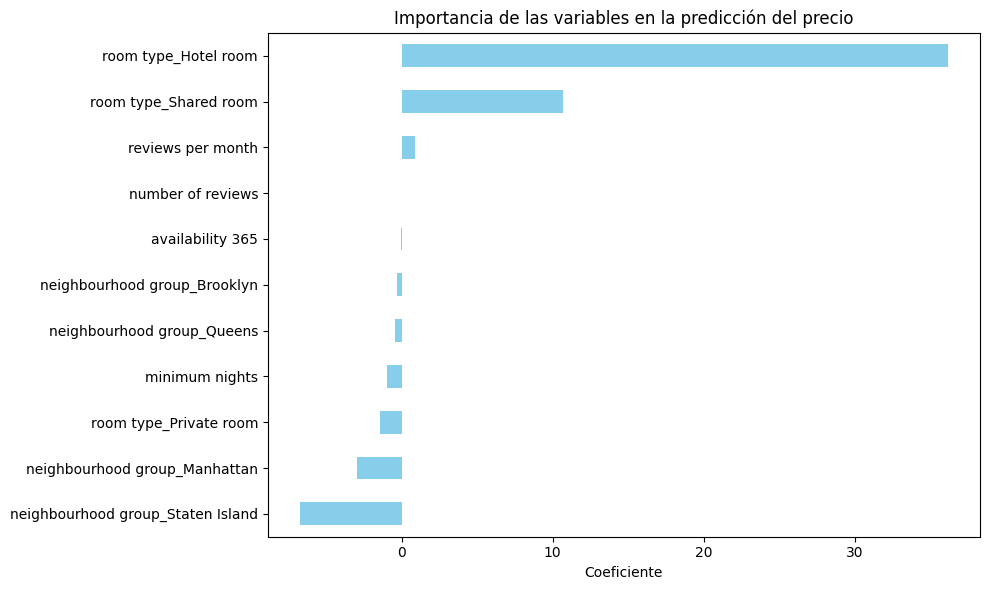

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========================
# 1. PREPARACIÓN FINAL (SIN service fee)
# ========================

columnas_utiles = [
    'price', 'minimum nights', 'number of reviews',
    'reviews per month', 'availability 365',
    'room type', 'neighbourhood group'
]

df_modelo = df[columnas_utiles].copy()

# Codificación one-hot con variables numéricas
df_modelo = pd.get_dummies(df_modelo, columns=['room type', 'neighbourhood group'], drop_first=True, dtype=int)

# Eliminar valores nulos
df_modelo = df_modelo.dropna()

# ========================
# 2. DIVISIÓN ENTRENAMIENTO / PRUEBA
# ========================

X = df_modelo.drop(columns='price')
y = df_modelo['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========================
# 3. ENTRENAMIENTO Y PREDICCIÓN
# ========================

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# ========================
# 4. EVALUACIÓN
# ========================

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.3f}')

# ========================
# 5. IMPORTANCIA DE VARIABLES
# ========================

importancia = pd.Series(modelo.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10,6))
importancia.plot(kind='barh', color='skyblue')
plt.title('Importancia de las variables en la predicción del precio')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


Tras retirar la variable service fee, el modelo lineal mostró un bajo rendimiento (R² ≈ 0), lo que indica que las variables disponibles no explican suficientemente el precio por sí solas.
Esto revela que el problema es más complejo y requiere:

Enriquecer el dataset con variables como neighbourhood, review score, tamaño o categoría del alojamiento.

Aplicar técnicas como transformación logarítmica de precios.

Utilizar modelos más avanzados (Random Forest, XGBoost) capaces de capturar relaciones no lineales.

**Random Forest**

Usamos un modelo Random Forest y comparamos los resultados con los que se obtienen al aplicar el modelo de regresión lineal

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Entrenamiento con Random Forest
# -------------------------------

modelo_rf = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

# -------------------------------
# 2. Evaluación del modelo RF
# -------------------------------

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" RANDOM FOREST REGRESSOR")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

# -------------------------------
# 3. Comparación con regresión lineal
# -------------------------------

# Ya entrenado antes:
y_pred_lr = modelo.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n REGRESIÓN LINEAL")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.3f}")


 RANDOM FOREST REGRESSOR
RMSE: 287.08
MAE: 221.36
R²: 0.238

 REGRESIÓN LINEAL
RMSE: 328.80
MAE: 284.15
R²: -0.000


Aplicaremos una transformación logarítmica a la variable price para observar si el error disminuye ya que tenemos datos dispersos

In [49]:
import numpy as np

# Aplicamos log(1 + price) para evitar errores con precios 0
df_modelo['price'] = np.log1p(df_modelo['price'])


In [51]:
# División
X = df_modelo.drop(columns='price')
y = df_modelo['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_rf = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_rf.fit(X_train, y_train)

# Predecir en escala logarítmica
y_pred_log = modelo_rf.predict(X_test)

# Invertimos el log para volver a escala real
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

# Evaluación en escala original
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(" RANDOM FOREST (con log(price))")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")


 RANDOM FOREST (con log(price))
RMSE: 307.25
MAE: 233.71
R²: 0.127


Se evaluó el impacto de una transformación logarítmica sobre la variable objetivo (price). Aunque esta técnica suele mejorar la estabilidad del modelo ante valores extremos, en este caso concreto no produjo mejoras. El modelo original de Random Forest sin transformación obtuvo mejores resultados (R² = 0.238 vs. 0.127), por lo que se mantuvo esa versión como final.

El histograma comparativo muestra la distribución de precios reales frente a los predichos por el modelo de Random Forest.
Se observa que los precios reales están mucho más dispersos, con una distribución más plana y presencia de valores altos (>1000 €), mientras que los precios predichos se agrupan en torno a un rango medio (400 €–600 €).
Esto indica que el modelo tiene una tendencia a predecir precios promedio, sin capturar correctamente los alojamientos con precios muy bajos o muy altos.
Esta limitación es común en modelos que carecen de variables específicas como el tamaño del alojamiento, el barrio exacto, o la calidad del hospedaje.

**Análisis de importancia de variables**

Random Forest calcula la "importancia" de cada variable según cuánto reduce el error en los árboles del modelo. Es una métrica relativa: cuanto más importante, mayor contribución a las predicciones.

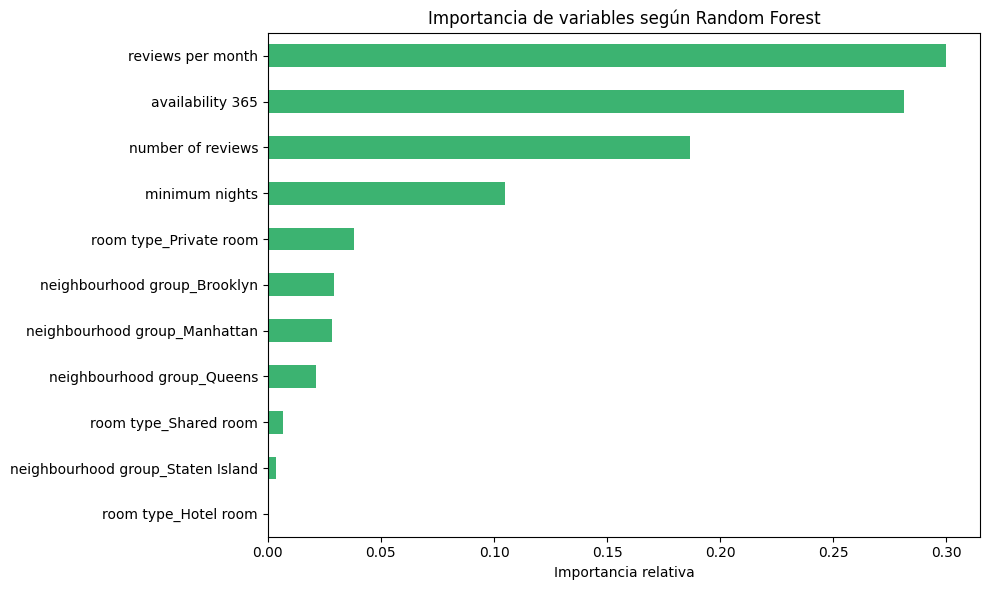

In [48]:
# Extraer importancia de variables del modelo de Random Forest
importancia_rf = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancia_rf = importancia_rf.sort_values()

# Visualización
plt.figure(figsize=(10,6))
importancia_rf.plot(kind='barh', color='mediumseagreen')
plt.title('Importancia de variables según Random Forest')
plt.xlabel('Importancia relativa')
plt.tight_layout()
plt.show()


Según el modelo de Random Forest, las variables que más influyen en el precio son:

reviews per month (30%) y availability 365 (27.5%), lo que sugiere que la
frecuencia de reseñas y la disponibilidad anual del alojamiento tienen una fuerte relación con el precio.

También destacan number of reviews y minimum nights, indicando que el comportamiento del alojamiento en el tiempo (historial y requisitos mínimos) influye más que el tipo o la zona.

En contraste, variables como room type o neighbourhood group tienen un peso menor en la predicción del precio, lo que podría deberse a que son categorías más generales y no capturan la especificidad del alojamiento.

Realizamos una comparación entre los precios reales y los precios predichos

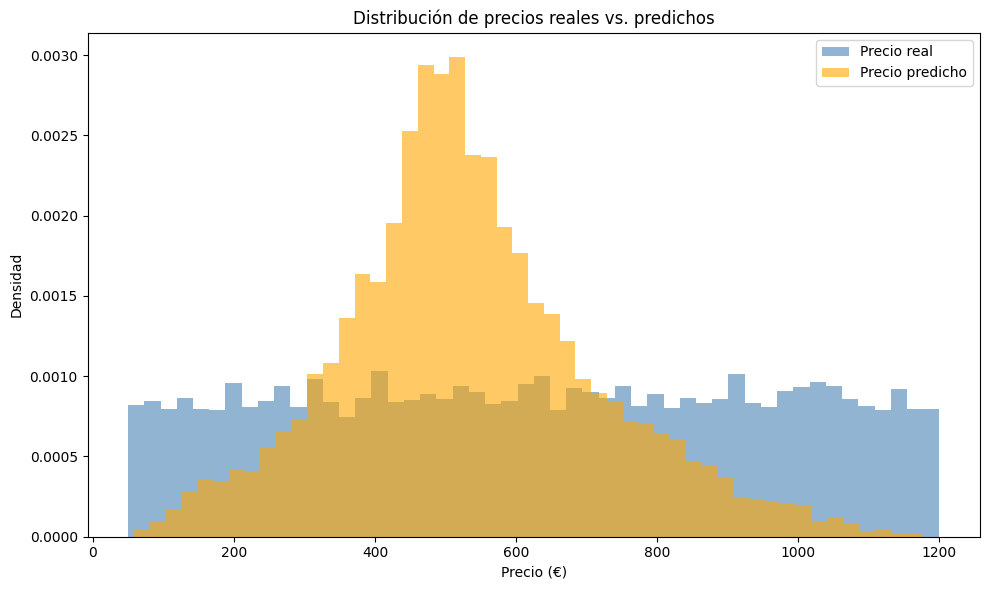

In [52]:
plt.figure(figsize=(10,6))

# Histograma de precios reales
plt.hist(y_test_real, bins=50, alpha=0.6, label='Precio real', color='steelblue', density=True)

# Histograma de precios predichos
plt.hist(y_pred_real, bins=50, alpha=0.6, label='Precio predicho', color='orange', density=True)

plt.title('Distribución de precios reales vs. predichos')
plt.xlabel('Precio (€)')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


## 4. Conclusiones

1. ¿Qué zonas tienen alojamientos más caros o accesibles?

A través del análisis exploratorio con visualizaciones, se observó que Manhattan concentra la mayoría de los alojamientos con precios altos, especialmente aquellos del tipo "Entire home/apt". Brooklyn presenta una oferta más diversa, con precios intermedios. Queens, Staten Island y, en menor medida, Bronx (si existiera en el dataset), presentan precios significativamente más bajos, siendo zonas más accesibles para los viajeros.

Esto sugiere una clara relación entre la zona (neighbourhood group) y el rango de precios, aunque con dispersión interna que también depende del tipo de alojamiento.

2. ¿Qué variables influyen más en el precio?

Según el modelo de Random Forest, las variables con mayor importancia relativa en la predicción del precio son:


*   reviews per month: Indicador de demanda reciente.
*   availability 365: Refleja si el alojamiento está disponible todo el año.
*   number of reviews: Popularidad histórica.
*   minimum nights: Afecta a la flexibilidad de reserva.

Por el contrario, las variables room type y neighbourhood group, aunque relevantes a nivel general, tuvieron menor impacto directo en el modelo, lo que puede deberse a que son categorías amplias que no capturan las diferencias específicas entre alojamientos similares.

## Recomendaciones

Para mejorar la precisión del modelo, sería recomendable:

*   Incorporar variables adicionales como puntuaciones de los huéspedes, tamaño del alojamiento, año de construcción o el barrio específico (neighbourhood).

*   Segmentar el análisis por tipo o zona.

*   Explorar modelos más complejos como XGBoost o aplicar ajuste de hiperparámetros.

###  Conclusiones finales

Este informe presenta un análisis completo del conjunto de datos de Airbnb, con un enfoque en segmentación de oferta y predicción de precios. Se emplearon técnicas de limpieza, visualización, modelado y evaluación de desempeño. El mejor resultado se obtuvo con Random Forest, aunque se recomienda enriquecer el dataset para una mayor precisión.

**Autor:** Ingrid Sayuri Mota de la Rosa  
**Fecha:** 14/05/2025
